In [1]:
# API Cleaning Text and Visualize for Better Knowing maybe 

In [ ]:
## Running UI 

In [32]:
import threading
from app import app
from database import inisiasi_db

def jalankan_flask():
    inisiasi_db()
    app.run(debug=True, use_reloader=False)

# Menjalankan Flask di latar belakang
threading.Thread(target=jalankan_flask).start()


 * Serving Flask app 'app'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
## Testing with python command only

In [1]:
import pandas as pd


# Load dictionaries
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
abusive_dict = pd.read_csv('abusive.csv', encoding='latin-1')

alay_dict_map = dict(zip(alay_dict[0], alay_dict[1]))

# Load abusive_dict_map
abusive_dict_map = {}
expected_column = 'ABUSIVE'  # Ganti dengan nama kolom yang ada

if expected_column in abusive_dict.columns:
    abusive_dict_map = dict(zip(abusive_dict[expected_column], [None] * len(abusive_dict)))
else:
    print(f"Warning: Column '{expected_column}' not found in abusive.csv. Using default mapping.")
    abusive_dict_map = {}  # Kebutuhan aja jadi bisa beda beda


In [2]:
## **MAKE SURE ALL THOSE CSV FILE on VENV_BINAR**

In [3]:
import re  # Mengimpor modul regex untuk operasi string

# Fungsi untuk mengubah teks menjadi huruf kecil
def lowercase(text):
    return text.lower()

# Fungsi untuk menghapus karakter yang tidak diperlukan
def remove_unnecessary_char(text):
    text = re.sub(r'\\+n', ' ', text)  # Mengganti '\n' dengan spasi
    text = re.sub(r'\n', ' ', text)  # Mengganti newline dengan spasi
    text = re.sub(r'\brt\b', ' ', text, flags=re.IGNORECASE)  # Mengganti 'RT' (retweet) dengan spasi
    text = re.sub(r'\buser\b', ' ', text, flags=re.IGNORECASE)  # Mengganti 'user' dengan spasi
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)  # Mengganti URL dengan spasi
    text = re.sub(r'[:,;\\+]', ' ', text)  # Mengganti karakter tertentu dengan spasi
    text = re.sub(r'  +', ' ', text)  # Mengganti spasi ganda dengan spasi tunggal
    return text

# Fungsi untuk menghapus karakter non-alfanumerik
def remove_non_alphanumeric(text):
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)  # Mengganti karakter non-alfanumerik dengan spasi
    return text

# Fungsi untuk menormalkan teks menggunakan kamus bahasa gaul ('alay')
def normalize_alay(text):
    return ' '.join([alay_dict_map.get(word, word) for word in text.split()])  # Mengganti kata-kata gaul dengan bentuk normalnya

# Fungsi untuk menghapus emotikon byte
def remove_emoticon_byte(text):
    text = text.replace("\\", " ")  # Mengganti backslash dengan spasi
    text = re.sub(r'x..', ' ', text)  # Mengganti pola byte dengan spasi
    text = re.sub(r' n ', ' ', text)  # Mengganti pola ' n ' dengan spasi
    text = re.sub(r'  +', ' ', text)  # Mengganti spasi ganda dengan spasi tunggal
    return text

# Fungsi untuk menghapus spasi awal
def remove_early_space(text):
    if text and text[0] == ' ':
        return text[1:]  # Menghapus spasi di awal teks
    return text

# Fungsi utama untuk membersihkan teks
def cleanse_text(text):
    text = lowercase(text)  # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = remove_non_alphanumeric(text)  # Menghapus karakter non-alfanumerik dari teks
    text = remove_unnecessary_char(text)  # Menghapus karakter yang tidak diperlukan dari teks
    words = []  # Membuat list kosong untuk menyimpan kata-kata yang sudah dibersihkan
    for word in text.split():  # Memisahkan teks menjadi kata-kata dan iterasi melalui setiap kata
        cleaned_word = alay_dict_map.get(word, word)  # Mengganti kata jika ada dalam kamus alay, jika tidak, gunakan kata asli
        if cleaned_word.lower() in abusive_dict_map:  # Jika kata yang sudah dibersihkan ada dalam kamus kata kasar
            words.append(cleaned_word.lower())  # Tambahkan kata kasar tersebut ke dalam list (dengan huruf kecil)
        elif isinstance(cleaned_word, str) and cleaned_word.strip():  # Jika kata sudah dibersihkan adalah string dan bukan hanya spasi
            words.append(cleaned_word)  # Tambahkan kata ke dalam list
    text = ' '.join(words)  # Gabungkan kata-kata dalam list menjadi teks baru dengan spasi sebagai pemisah
    text = remove_emoticon_byte(text)  # Menghapus emotikon dan byte yang tidak diinginkan dari teks
    text = remove_early_space(text)  # Menghapus spasi awal yang tidak perlu dari teks
    return text  # Mengembalikan teks yang sudah dibersihkan


# Fungsi untuk membersihkan file CSV
def cleanse_file(filepath):
    try:
        df = pd.read_csv(filepath, encoding='latin-1')  # Membaca file CSV dengan encoding latin-1
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None
    
    if 'Tweet' in df.columns:
        df['cleaned_text'] = df['Tweet'].apply(cleanse_text)  # Membersihkan teks pada kolom 'Tweet'
    else:
        print("Column 'Tweet' not found in the DataFrame.")
        return None
    
    return df


In [4]:
# Import libraries
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data dengan tema yang lebih menarik
from wordcloud import WordCloud  # Untuk membuat word cloud
from collections import Counter, OrderedDict  # Untuk menghitung frekuensi kata dan mengurutkan

# Load dictionaries
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)  # Memuat kamus alay
abusive_dict = pd.read_csv('abusive.csv', encoding='latin-1')  # Memuat kamus kata kasar

alay_dict_map = dict(zip(alay_dict[0], alay_dict[1]))  # Membuat mapping dari kamus alay

# Load abusive_dict_map
abusive_dict_map = {}  # Inisialisasi dictionary untuk kata kasar
expected_column = 'ABUSIVE'  # Nama kolom yang diharapkan ada di abusive.csv

if expected_column in abusive_dict.columns:  # Mengecek apakah kolom 'ABUSIVE' ada di file
    abusive_dict_map = dict(zip(abusive_dict[expected_column], [None] * len(abusive_dict)))  # Membuat mapping kata kasar
else:
    print(f"Warning: Column '{expected_column}' not found in abusive.csv. Using default mapping.")
    abusive_dict_map = {}  # Jika tidak ada, gunakan mapping default

# Define text cleaning functions
def lowercase(text):
    return text.lower()  # Mengubah teks menjadi huruf kecil semua

def remove_unnecessary_char(text):
    text = re.sub(r'\\+n', ' ', text)  # Menghapus karakter '\n'
    text = re.sub(r'\n', ' ', text)  # Menghapus newline
    text = re.sub(r'\brt\b', ' ', text, flags=re.IGNORECASE)  # Menghapus retweet 'rt'
    text = re.sub(r'\buser\b', ' ', text, flags=re.IGNORECASE)  # Menghapus kata 'user'
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)  # Menghapus URL
    text = re.sub(r'[:,;\\+]', ' ', text)  # Menghapus karakter :, ; dan +
    text = re.sub(r'  +', ' ', text)  # Menghapus spasi berlebih
    return text

def remove_non_alphanumeric(text):
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)  # Menghapus karakter non-alphanumeric
    return text

def normalize_alay(text):
    return ' '.join([alay_dict_map.get(word, word) for word in text.split()])  # Mengganti kata alay dengan kata normal

def remove_emoticon_byte(text):
    text = text.replace("\\", " ")  # Menghapus backslash
    text = re.sub(r'x..', ' ', text)  # Menghapus emoticon byte
    text = re.sub(r' n ', ' ', text)  # Menghapus spasi ' n '
    text = re.sub(r'  +', ' ', text)  # Menghapus spasi berlebih
    return text

def remove_early_space(text):
    if text and text[0] == ' ':  # Jika teks dimulai dengan spasi
        return text[1:]  # Hapus spasi awal
    return text

def cleanse_text(text):
    text = lowercase(text)  # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = remove_non_alphanumeric(text)  # Menghapus karakter non-alfanumerik dari teks
    text = remove_unnecessary_char(text)  # Menghapus karakter yang tidak diperlukan dari teks
    words = []  # Membuat list kosong untuk menyimpan kata-kata yang sudah dibersihkan
    for word in text.split():  # Memisahkan teks menjadi kata-kata dan iterasi melalui setiap kata
        cleaned_word = alay_dict_map.get(word, word)  # Mengganti kata jika ada dalam kamus alay, jika tidak, gunakan kata asli
        if cleaned_word.lower() in abusive_dict_map:  # Jika kata yang sudah dibersihkan ada dalam kamus kata kasar
            words.append(cleaned_word.lower())  # Tambahkan kata kasar tersebut ke dalam list (dengan huruf kecil)
        elif isinstance(cleaned_word, str) and cleaned_word.strip():  # Jika kata sudah dibersihkan adalah string dan bukan hanya spasi
            words.append(cleaned_word)  # Tambahkan kata ke dalam list
    text = ' '.join(words)  # Gabungkan kata-kata dalam list menjadi teks baru dengan spasi sebagai pemisah
    text = remove_emoticon_byte(text)  # Menghapus emotikon dan byte yang tidak diinginkan dari teks
    text = remove_early_space(text)  # Menghapus spasi awal yang tidak perlu dari teks
    return text  # Mengembalikan teks yang sudah dibersihkan

# Baca data dan bersihkan teks
file_path = 'data.csv'  # Path file CSV
df = pd.read_csv(file_path)  # Membaca file CSV ke DataFrame

df['cleaned_text'] = df['Tweet'].apply(cleanse_text)  # Membersihkan teks di setiap baris



In [5]:
###Data Shape

In [6]:
print("Shape: ", df.shape)
df.head(5)

Shape:  (13169, 14)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_text
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku dan ku tau matamu sipit tapi dilih...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...


In [7]:
abusive_dict

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [8]:
# Analisis teks EDA

In [9]:
df.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

In [10]:
print(abusive_dict.head(5))

   ABUSIVE
0     alay
1    ampas
2     buta
3  keparat
4   anjing


In [11]:
print(df['cleaned_text'].head(5))

0    di saat semua cowok berusaha melacak perhatian...
1    siapa yang telat memberi tau kamu edan sarap g...
2    41 kadang aku berpikir kenapa aku tetap percay...
3    aku itu aku dan ku tau matamu sipit tapi dilih...
4    kaum cebong kafir sudah kelihatan dongoknya da...
Name: cleaned_text, dtype: object


OrderedDict({'asing': 738, 'komunis': 729, 'cebong': 550, 'kafir': 374, 'rezim': 366, 'anjing': 297, 'tai': 277, 'antek': 271, 'onta': 232, 'goblok': 230, 'kampret': 213, 'babi': 212, 'kontol': 195, 'bodoh': 191, 'dungu': 188, 'sipit': 186, 'monyet': 177, 'bani': 171, 'ngentot': 159, 'bangsat': 157, 'anjir': 156, 'cacat': 156, 'tolol': 153, 'memek': 149, 'bajingan': 148, 'banci': 141, 'buta': 132, 'bacot': 127, 'bego': 124, 'munafik': 121, 'gila': 116, 'bangkai': 114, 'setan': 112, 'berengsek': 110, 'kunyuk': 109, 'idiot': 105, 'sampah': 100, 'ngewe': 95, 'budek': 80, 'bisu': 73, 'lgbt': 71, 'mampus': 69, 'sarap': 67, 'iblis': 66, 'titit': 66, 'buaya': 66, 'bejat': 64, 'cocot': 64, 'rejim': 64, 'edan': 62, 'hina': 62, 'najis': 62, 'kampungan': 62, 'congor': 62, 'dongok': 60, 'jijik': 59, 'bencong': 58, 'jamban': 57, 'homo': 56, 'picek': 56, 'gembel': 55, 'kampang': 55, 'gay': 54, 'sinting': 54, 'udik': 53, 'taplak': 51, 'ateis': 51, 'jablay': 49, 'bong': 48, 'sontoloyo': 46, 'keparat':

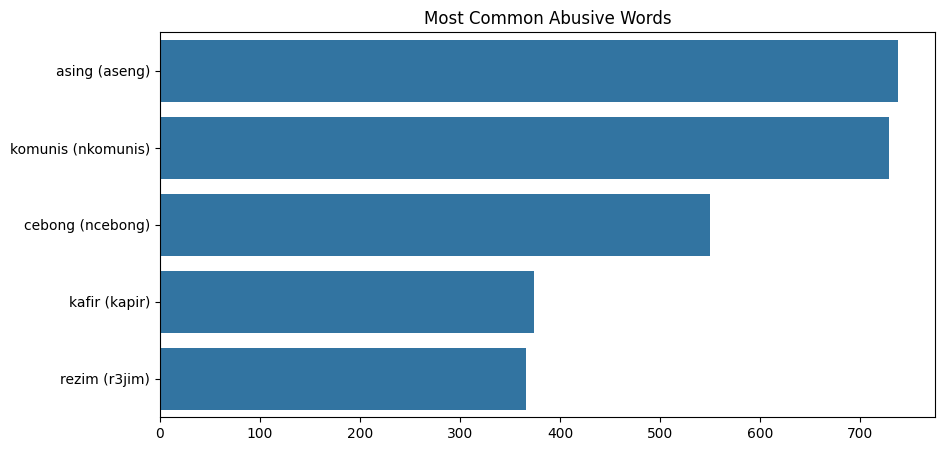

In [12]:
# Mengumpulkan kata-kata kasar dari teks yang sudah dibersihkan
tweets_corpus = [] 

for tweet in df['cleaned_text'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_dict_map:
            tweets_corpus.append(word)

# Menghitung frekuensi kata kasar
counter_tweets = Counter(tweets_corpus).most_common()[:1000]
top_tweets = OrderedDict(counter_tweets)

# Menampilkan beberapa kata kasar teratas
print(top_tweets)

# Visualisasi
show_only = 5
    
keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

original_slang = []
for word in keys:
    if word in alay_dict[1].values:
        original_slang.append(alay_dict.loc[alay_dict[1] == word, 0].values[0])
    else:
        original_slang.append(word)
        
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

plt.figure(figsize=(10, 5))  # Ukuran lebih besar agar visualisasi lebih jelas
sns.barplot(x=vals[:show_only], y=combined_words[:show_only])
plt.title('Most Common Abusive Words')
plt.show()

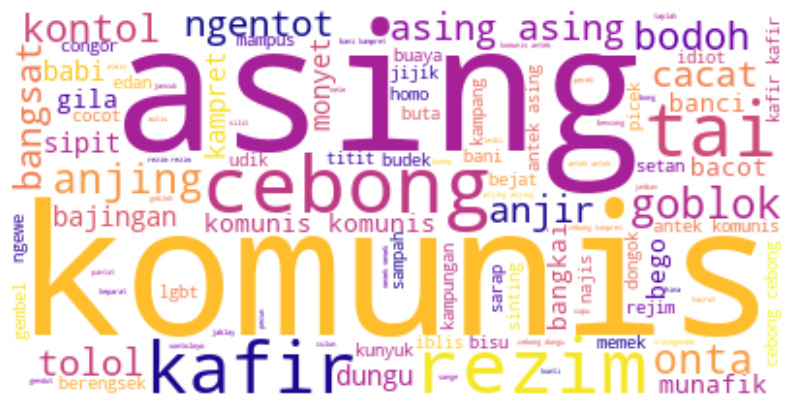

In [13]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 8))
tokens_ = ' '.join(tweets_corpus)
wc_ = WordCloud(max_words=100, background_color='white', max_font_size=100, colormap='plasma').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.show()

In [14]:
# Print beberapa kata alay dari kamus untuk memastikan mereka terdeteksi dengan benar
print(alay_dict.head())


                     0                         1
0  anakjakartaasikasik  anak jakarta asyik asyik
1         pakcikdahtua         pak cik sudah tua
2       pakcikmudalagi         pak cik muda lagi
3          t3tapjokowi              tetap jokowi
4                   3x                 tiga kali


OrderedDict({'enggak': 228, 'si': 101, 'ibukota': 94, 'hehe': 72, 'lo': 66, 'dongok': 60, 'picek': 56, 'twit': 54, 'segala': 52, 'baduy': 46, 'kau': 25, 'adek': 25, 'insyaallah': 21, 'penghianat': 20, 'sukmawati': 18, 'ha': 16, 'ne': 15, 'lu': 13, 'buktikan': 13, 'sihar': 11, 'dah': 11, 'ketawa': 11, 'nyembah': 11, 'quiz': 10, 'sumatera': 10, 'mention': 10, 'pengkhianat': 10, 'gua': 9, 'huhu': 9, 'wow': 9, 'duh': 8, 'kelojotan': 8, 'kaya': 8, 'hihi': 8, 'minta': 7, 'pemilu': 7, 'ena': 7, 'you': 7, 'iq': 6, 'kebinekaan': 6, 'gan': 6, 'sayangnya': 6, 'ngamuk': 6, 'mah': 5, 'belagu': 5, 'almaidah': 5, 'ok': 5, 'tunjukan': 5, 'mengikut': 5, 'syariah': 4, 'setelahnya': 4, 'jos': 4, 'ni': 4, 'moga': 4, 'tunjukkan': 4, 'ngapain': 4, 'ii': 4, 'maidah': 4, 'puter': 4, 'nikmati': 4, 'with': 4, 'tweet': 4, 'blusukan': 4, 'rabbal': 4, 'kerjaan': 4, 'asu': 4, 'anakku': 4, 'dog': 4, 'bakalan': 4, 'move': 4, 'udah': 3, 'sakitnya': 3, 'manggil': 3, 'rmol': 3, 's': 3, 'playing': 3, 'indo': 3, 'survey':

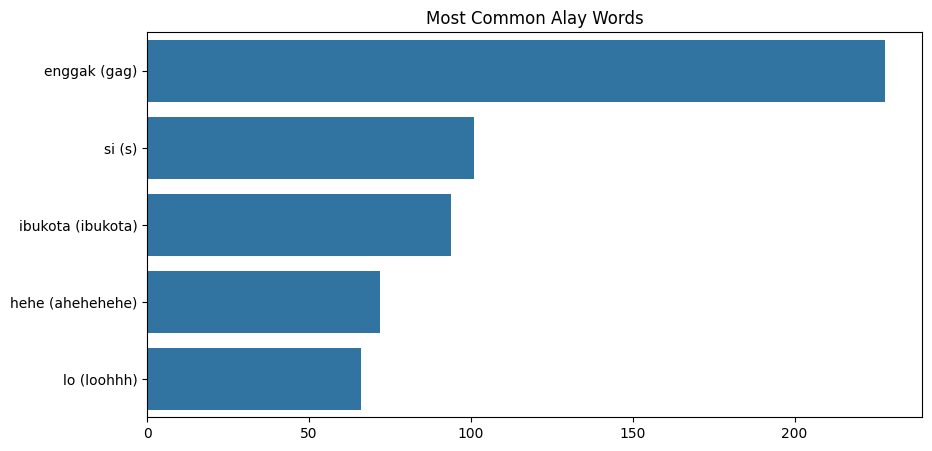

In [15]:
# Mengumpulkan kata-kata alay dari teks yang sudah dibersihkan
alay_corpus = [] 

for tweet in df['cleaned_text'].str.split():
    for word in tweet:
        if len(word) > 0 and word in alay_dict_map:
            alay_corpus.append(word)

# Menghitung frekuensi kata alay
counter_alay = Counter(alay_corpus).most_common()[:1000]
top_alay = OrderedDict(counter_alay)

# Menampilkan beberapa kata alay teratas
print(top_alay)

# Visualisasi
show_only = 5
    
keys = list(top_alay.keys())
vals = [top_alay[k] for k in keys]

original_slang = []
for word in keys:
    if word in alay_dict[1].values:
        original_slang.append(alay_dict.loc[alay_dict[1] == word, 0].values[0])
    else:
        original_slang.append(word)
        
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

plt.figure(figsize=(10, 5))  # Ukuran lebih besar agar visualisasi lebih jelas
sns.barplot(x=vals[:show_only], y=combined_words[:show_only])
plt.title('Most Common Alay Words')
plt.show()


In [16]:
# Collect alay words
alay_corpus = []

for tweet in df['cleaned_text'].str.split():
    for word in tweet:
        if len(word) > 0 and word in alay_dict_map:
            alay_corpus.append(word)

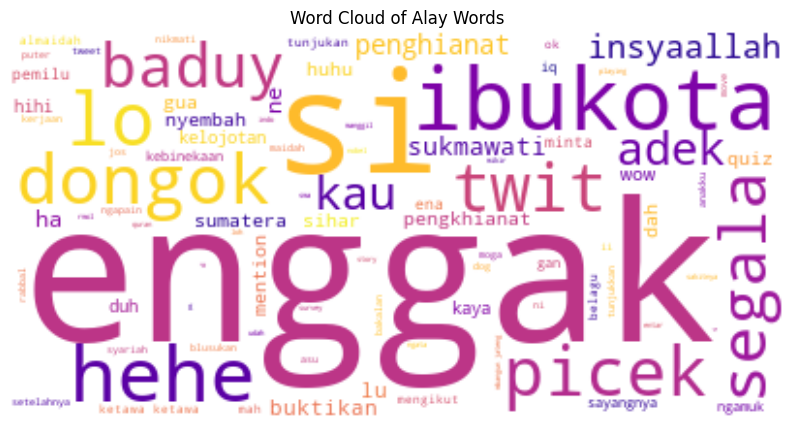

In [17]:
# Generate word cloud
tokens_ = ' '.join(alay_corpus)
fig, axes = plt.subplots(ncols=1, figsize=(10, 8))
wc_ = WordCloud(max_words=100, background_color='white', max_font_size=100, colormap='plasma').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.title('Word Cloud of Alay Words')
plt.show()

In [18]:
##Panjang Teks (JANGAN RUNNING IF MAU LABELING)

In [19]:
# Menghitung panjang teks
df['text_length'] = df['cleaned_text'].apply(len)


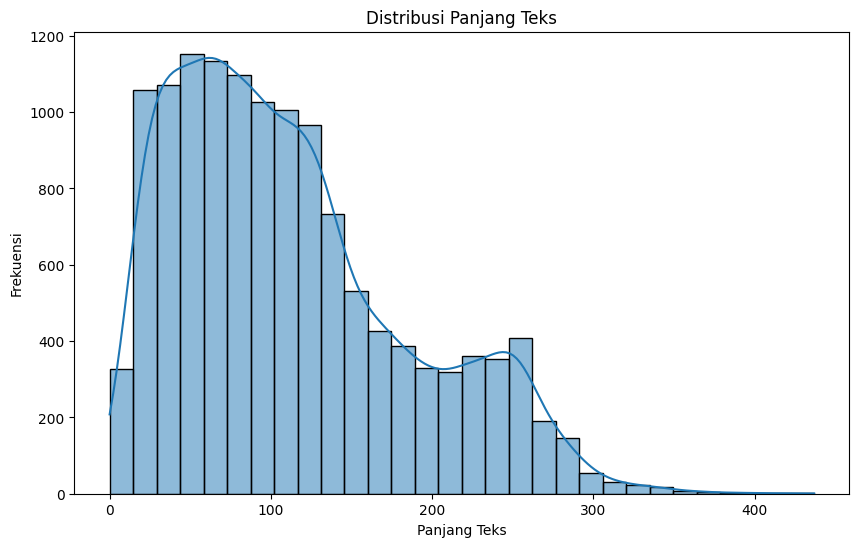

In [26]:

# Histogram distribusi panjang teks
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
#LABEL

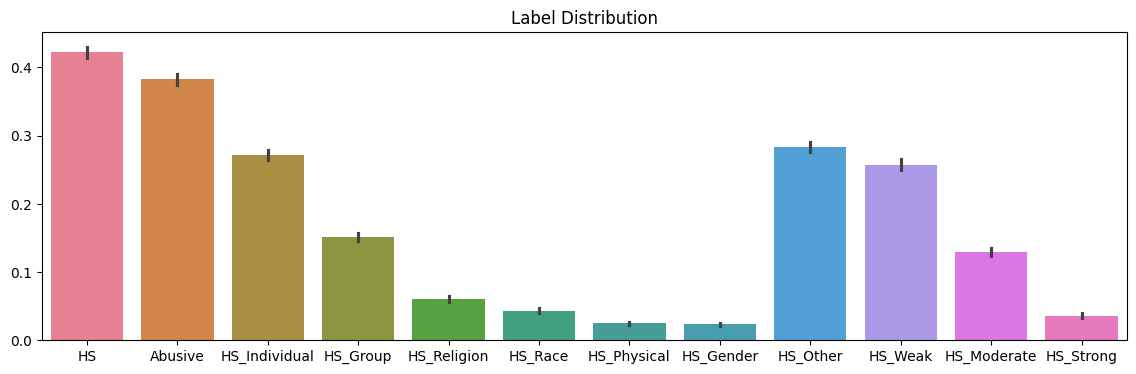

In [5]:
plt.figure(figsize=(14,4))
plt.title('Label Distribution')
sns.barplot(df)
plt.show()

In [ ]:
## HITUGN LABEL

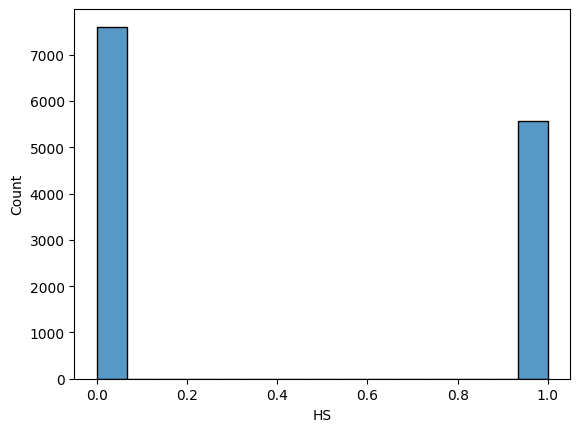

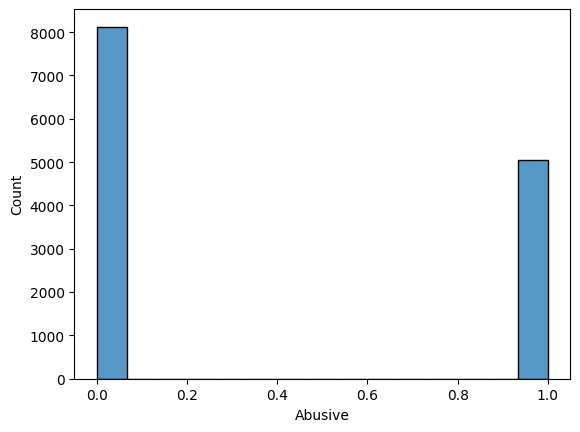

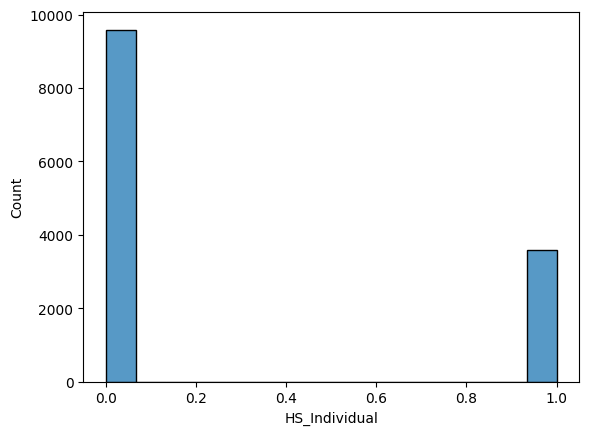

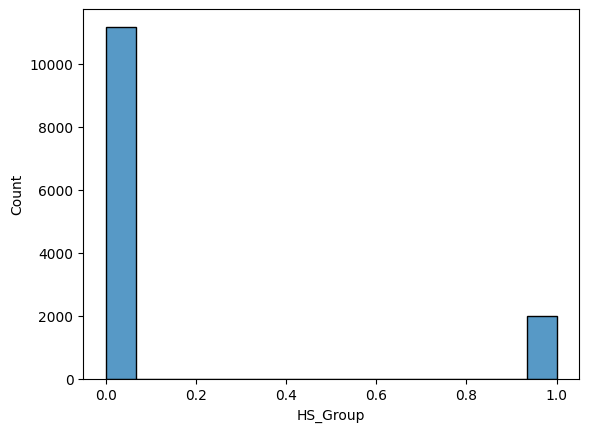

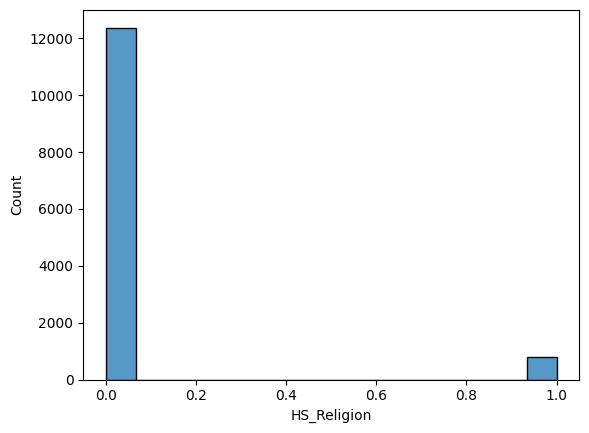

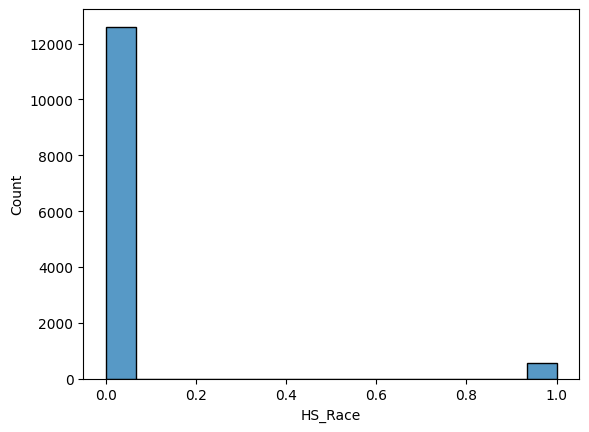

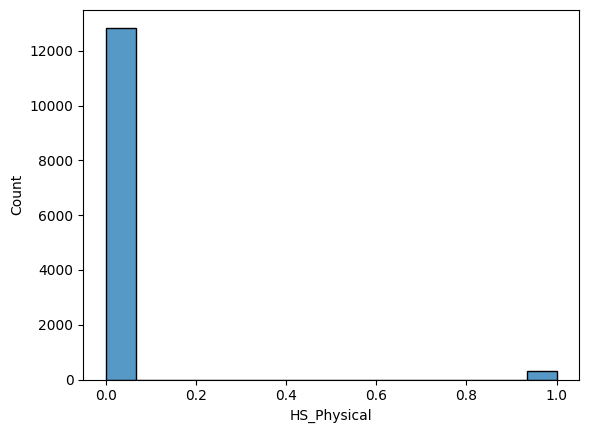

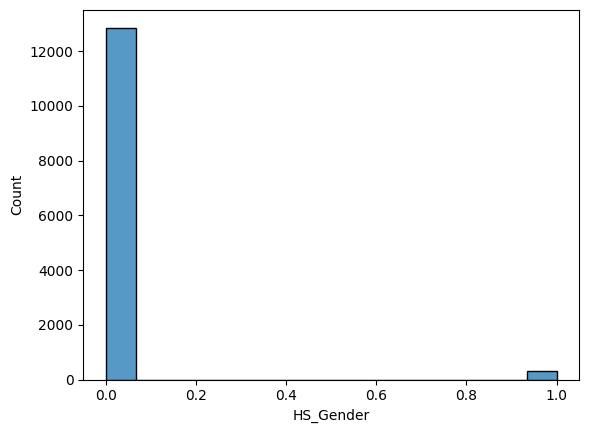

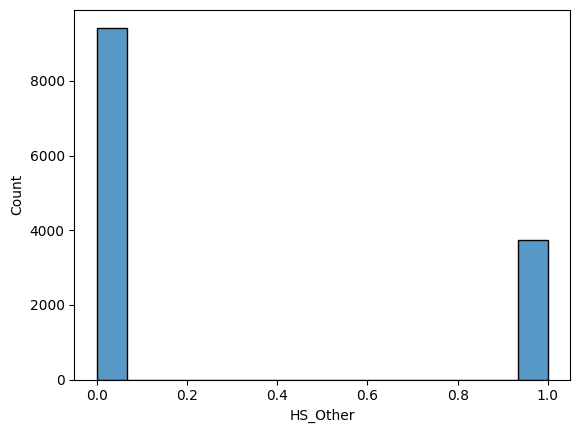

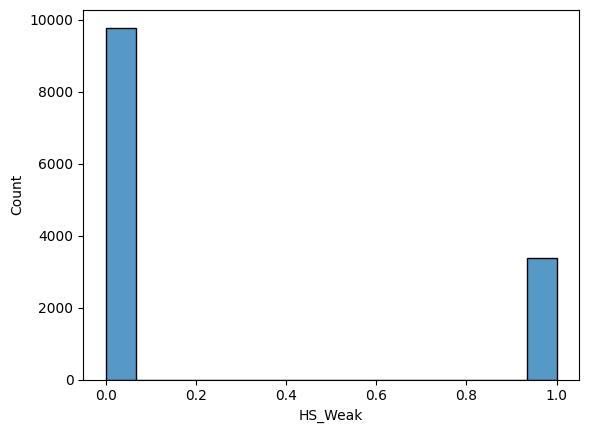

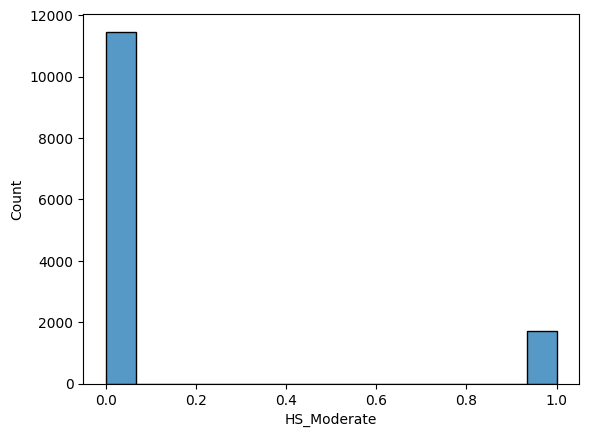

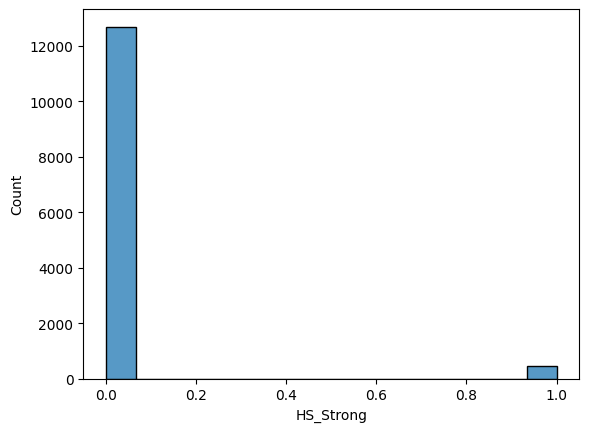

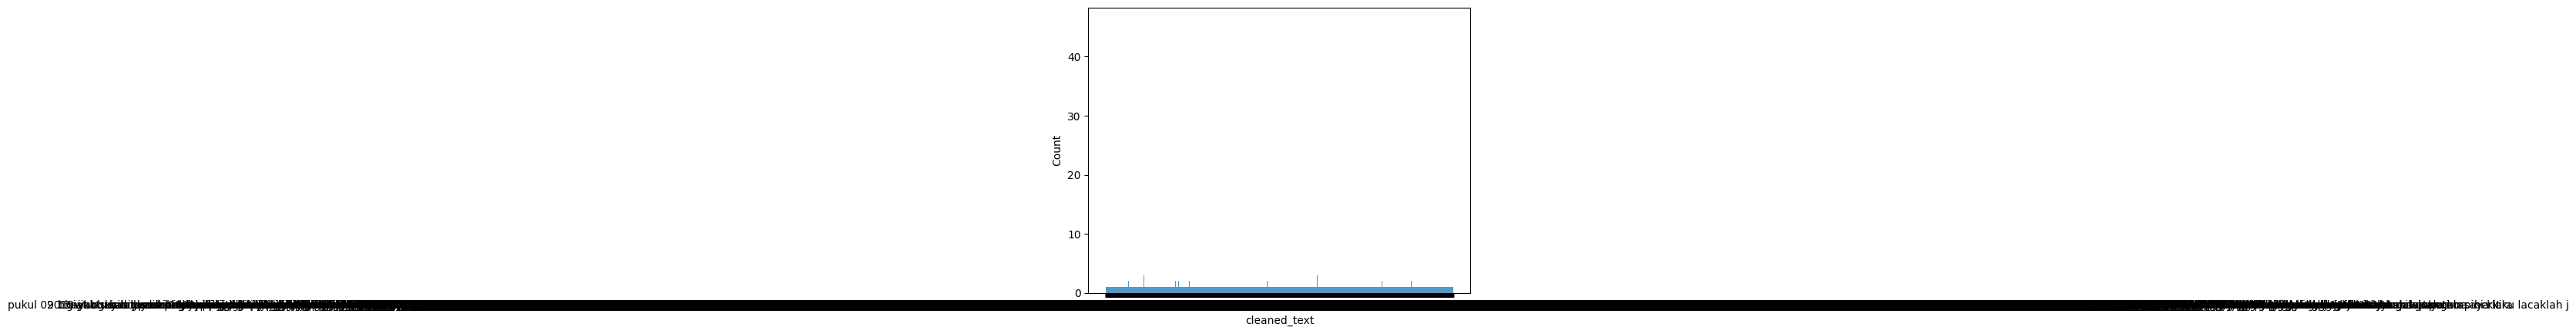

In [6]:
df1 = df.drop(['Tweet'], axis=1)
for i in df1.columns:
    j = 1
    plt.figure(j)
    sns.histplot(data=df1, x=i)
    plt.show()
    j = j+1